# Assignment 1

## I - Linear Regression

Build a model using a linear regression (Scikit-learn) algorithm to predict house prices. You can pick a feature from the dataset to work with the model.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
header_list = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', sep='\s+', names=header_list)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


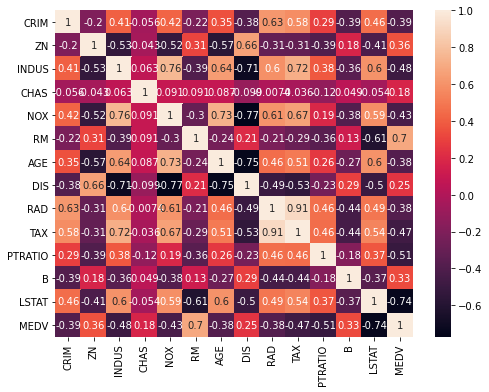

In [4]:
# Use Heapmap for check correlation between features and target
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [5]:
X = df[['LSTAT']]
y = df[['MEDV']]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#Validation
linReg = LinearRegression()
lin_model = linReg.fit(X_train, y_train)
y_val_pred = lin_model.predict(X_val)

print('RMSE of validation set: ', round(np.sqrt(mean_squared_error(y_val_pred, y_val)), 3))

RMSE of validation set:  5.81


Plot the data with the best fit line.
Calculate a RMSE score.
Calculate a R-squared score.

In [7]:
# Test
y_test_pred = linReg.predict(X_test)
print('RMSE of test set: ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 3))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_test_pred))

RMSE of test set:  5.795
Coefficient of determination: 0.54


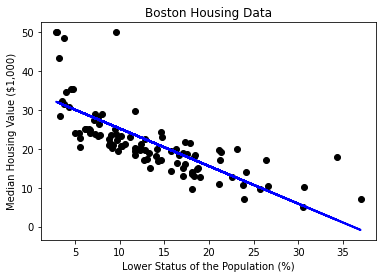

In [8]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=2)

plt.title('Boston Housing Data')
plt.xlabel('Lower Status of the Population (%)')
plt.ylabel('Median Housing Value ($1,000)');

plt.show()

## II - Polynomial Regression

Build a model using a Polynomial regression algorithm to predict house prices. Keep the same feature you selected from the previous part to work with the polynomial model.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X2 is only a feature, but the curve that we are fitting is in quadratic form.
Plot the best 2nd degree polynomail curve.
Calculate a RMSE score.
Calculate a R-squared score.
Plot another diagram for degree=20.

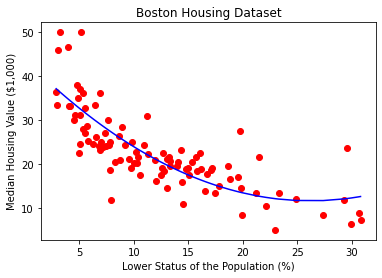

In [10]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly = poly2.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

X_val['MEDV'] = y_val
X_val_sorted = X_val.sort_values(by='LSTAT')
y_val_sorted = X_val_sorted['MEDV']
del X_val_sorted['MEDV']

def viz_polymonial_2():
    plt.scatter(X_val_sorted, y_val_sorted, color='red')
    plt.plot(X_val_sorted, poly_model.predict(poly2.fit_transform(X_val_sorted)), color='blue')
    plt.title('Boston Housing Dataset')
    plt.xlabel('Lower Status of the Population (%)')
    plt.ylabel('Median Housing Value ($1,000)')
    plt.show()
    
viz_polymonial_2()

In [11]:
# Test
X_test_poly = poly2.fit_transform(X_test)
y_test_pred = poly_model.predict(X_test_poly)
print('RMSE of test set: ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 3))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_test_pred))

RMSE of test set:  5.246
Coefficient of determination: 0.62


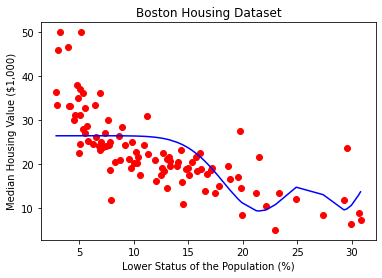

In [12]:
poly20 = PolynomialFeatures(degree=20)
X_train_poly_20 = poly20.fit_transform(X_train)
poly_model.fit(X_train_poly_20, y_train)

def viz_polymonial_20():
    plt.scatter(X_val_sorted, y_val_sorted, color='red')
    plt.plot(X_val_sorted, poly_model.predict(poly20.fit_transform(X_val_sorted)), color='blue')
    plt.title('Boston Housing Dataset')
    plt.xlabel('Lower Status of the Population (%)')
    plt.ylabel('Median Housing Value ($1,000)')
    plt.show()
    
viz_polymonial_20()

## III - Multiple Regression

Build a model using a multiple regression algorithm to predict house prices. Select 3 or more features to work with the model.

Calculate a RMSE score.
Calculate a R-squared score.
Calculate an adjusted R-squared score.

In [13]:
# 3 features
X = df[['RM','PTRATIO','LSTAT']]
y = df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#Validation
linReg = LinearRegression()
mul_lin_model = linReg.fit(X_train, y_train)
y_val_pred = mul_lin_model.predict(X_val)
print('RMSE of validation set: ', round(np.sqrt(mean_squared_error(y_val_pred, y_val)), 3))

# Test
y_test_pred = mul_lin_model.predict(X_test)
print('RMSE of test set: ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 3))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_test_pred))
adjusted_R2 = 1 - (1-mul_lin_model.score(X_test, y_test))*(len(y)-1)/(len(y)-X_test.shape[1]-1)
print('Adjusted R-Square: ', adjusted_R2)

RMSE of validation set:  5.016
RMSE of test set:  5.233
Coefficient of determination: 0.63
Adjusted R-Square:  0.6242810041176508


In [14]:
# All Features
X = df.copy()
del X['MEDV']
y = df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#Validation
linReg = LinearRegression()
all_lin_model = linReg.fit(X_train, y_train)
y_val_pred = all_lin_model.predict(X_val)
print('RMSE of validation set: ', round(np.sqrt(mean_squared_error(y_val_pred, y_val)), 3))

# Test
y_test_pred = all_lin_model.predict(X_test)
print('RMSE of test set: ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 3))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_test_pred))
adjusted_R2 = 1 - (1-all_lin_model.score(X_test, y_test))*(len(y)-1)/(len(y)-X_test.shape[1]-1)
print('Adjusted R-Square: ', adjusted_R2)


RMSE of validation set:  4.729
RMSE of test set:  5.03
Coefficient of determination: 0.66
Adjusted R-Square:  0.6459150083139054
